# Fundamentos 4: Funciones y clases

## Funciones

En terminos sencillos, una función es un grupo de líneas de código. Si debemos ejecutar estas líneas más de una vez, es una buena idea utilizar una función. 

Las funciones son como dispositivos que pueden tomar parámetros de entrada y proporcionar resultados. El resultado de la función puede ser un dato o una operación sobre el parámetro de entrada. Básicamente, hay dos razones principales para utilizar funciones:

- Máxima reutilización del código y menos repetición.
- Programación estructurada, es decir, dividir una tarea grande y compleja en partes más pequeñas y simples.

La sintaxis de una función es:

```python
def nombre_de_la_funcion(arg_1, arg_2...arg_n):
    codigo
    return valor
```

`def` es el encabezado de la función, es lo que genera la función como un objeto y le asigna un nombre. En el paréntesis, los parámetros de entrada son incluidos. Cuando la función no tiene parámetros de entrada, el paréntesis se deja vacio. Después de los dos puntos `:`, el código de la función se incluye. La línea con `return` devuelve un valor (o valores). Si `valor` no es especificado, la función devuelve `None`. Ambos, `valor` y `return` son opcionales. Veamos un ejemplo.

### Área de un polígono

El área de un polígono de cualquier forma (excepto uno que se cruza a si mismo) puede ser calculada con la siguiente fórmula:

</br><div align="center">$A=\frac{1}{2} \sum_{i=1}^n\left(x_i y_{i+1}-x_{i+1} y_i\right) \text { if } i+1>n, i+1=1$</div></br>

donde $n$ es el número de puntos o vértices del polígono, y ($x_i$, $y_i$) son las coordenadas $x$ y $y$ de los puntos. Por ejemplo, para un polígono de cuatro puntos el área es:

</br><div align="center">$A=\frac{1}{2}(x_1y_2-x_2y_1+x_2y_3-x_3y_2+x_3y_4-x_4y_3+x_4y_1-x_1y_4)$</div></br>

Esta ecuación da un area positiva si los puntos están ordenados contrario a las agujas del reloj, o un área negativa si los puntos siguen las agujas del reloj.

1. Escriba una función llamada `polig_area`, que calcula el área de un polígono.
2. Los parámetros de entrada de la función son las coordenadas $x$ y $y$ de los puntos del polígono. 
3. La función devuelve el `area` del polígono.

La siguiente celda contiene la función:

In [1]:
import numpy as np # cargue la librería numpy con el alias np

def polig_area(x, y):
    """
    polig_area calcula el área de un polígono. 
    x, y son arreglos unidimensionales que contienen
    las coordenadas de los vértices del polígono.
    """
    x_s = np.roll(x, 1) # Desplaze x 1 índice. x_s comienza en el 2do elemento, y termina en el 1er elemento
    y_s = np.roll(y, 1) # Desplaze y 1 índice. y_s comienza en el 2do elemento, y termina en el 1er elemento
    suma = np.sum(x * y_s - x_s * y) # sumatoría en la ecuación de área
    area = 0.5 * np.abs(suma) # área del polígono
    
    return area # devuelva el área del polígono    

En la función, usamos el método de numpy `roll()` para desplazar los arreglos `x`, `y` 1 índice. Luego realizamos la operación en el paréntesis de la ecuación de área, y calculamos la sumatoria usando el método `sum()`. El área es igual al valor absoluto (método `abs()`) de la mitad de la sumatoria. El valor absoluto es necesario, porque no sabemos si los puntos estan organizados de acuerdo o contrario a las agujas del reloj. Obviamente, el área debe ser positiva.

El texto en rojo al comienzo de la función es llamado `docstring`, y explica la función. Es muy importante incluir una definición clara. Este texto puede obtenerse, seleccionando el nombre de la función, y presionando al mismo tiempo las teclas `Shift` y `Tab`. Alternativemente, también se puede ver este texto añadiendo despues del nombre de la función el símbolo de interrogación `?`, como en la celda siguiente:

In [2]:
polig_area?

También se puede obtener sólo el docstring:

In [3]:
print(polig_area.__doc__)


    polig_area calcula el área de un polígono. 
    x, y son arreglos unidimensionales que contienen
    las coordenadas de los vértices del polígono.
    


Esto funciona con cualquier función interna o externa que haya sido cargada.

### Ejercicio

El archivo `contornos.txt`contiene las coordenadas $x$ (este), $y$ (norte), y $z$ (espesor vertical) de contornos en una trampa estructural. $x$, $y$, y $z$ están en metros, y los valores $z$ de los contornos van de 0 a 30 m, en intervalos de 5 m. Calcule el volumen de la trampa.

Para resolver este ejercicio, seguiremos los siguientes pasos:

1. Cargar y visualizar los datos.
2. Calcular las áreas de los contornos.
3. Calcular el volumen de la trampa.

#### Paso 1: Cargar y visualizar los datos

El siguiente código carga y grafica los contornos. Aunque todavía no hemos hablado de estos temas, por el momento fíjese lo fácil que es cargar y visualizar datos en Python.

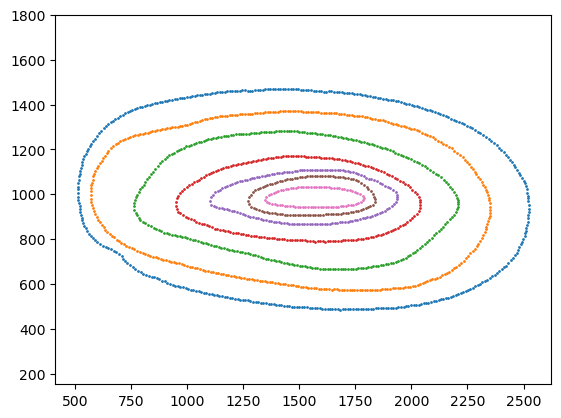

In [4]:
import matplotlib.pyplot as plt # cargue matplotlib.pyplot con el alias plt -> esta librería hace la gráfica

contornos = np.loadtxt("contornos.txt") # cargue los contornos, en pet_neto.txt, espacios separan las columnas

c_valores = np.arange(0, 35, 5) # valores z de los contornos

for c_valor in c_valores: # itere sobre los valores z de los contornos
    contorno = contornos[contornos[:,2] == c_valor] # obtenga el contorno con z = c_valor
    plt.plot(contorno[:,0], contorno[:,1], ".", markersize=2) # grafique el contorno

plt.axis("equal"); # haga las escalas de los ejes iguales. El ; remueve mensajes innecesarios

El contorno de área más externo tiene el valor $z=0$. El contorno más interno tiene el valor $z=30$. Los contornos indican que la trampa tiene forma de domo. 

#### Paso 2: Calcule el área de los contornos

Calculemos el área de los contornos usando nuestra función polig_area. Note que en el bucle `for`, usamos el método `enumerate()` para extraer el indice `i` y valor `c_valor` de la iteración. `i` es necesario para asignar el área al contorno correspondiente:

In [5]:
areas = np.zeros(c_valores.size) # initialice las áreas de los contornos a 0

# itere sobre los valores z de los contornos
# el método enumerate() permite extraer el indice y valor de la iteración
for i, c_valor in enumerate(c_valores):
    contorno = contornos[contornos[:,2] == c_valor] # obtenga el contorno con z = c_valor
    areas[i] = polig_area(contorno[:,0], contorno[:,1]) # calcule el área del contorno usando polig_area
    print(f"z = {c_valor} m, área = {areas[i]:.1f} m^2") # despliegue el área del contorno

z = 0 m, área = 1602030.5 m^2
z = 5 m, área = 1126504.5 m^2
z = 10 m, área = 659259.0 m^2
z = 15 m, área = 315659.0 m^2
z = 20 m, área = 150486.0 m^2
z = 25 m, área = 78587.0 m^2
z = 30 m, área = 31450.5 m^2


#### Paso 3: Calcule el volumen de la trampa

Matemáticamente, podemos expresar el volumen de la trampa como:

</br><div align="center">$V=\int_a^b A(z) d z$</div></br>

Para entender esta fórmula, imagínese que cortamos el volumen en muchas tajadas horizontales, estas son contornos. Podemos entonces determinar el volumen entre cada par de tajadas adyacentes, y finalmente sumar los volumenes entre las tajadas para calcular el volumen total.

Así que solamente necesitamos hacer una integración. En el código siguiente, usamos el módulo `scipy.integrate` y 
el método `trapz()` (regla trapezoidal) para hacer la integración:

In [6]:
from scipy import integrate # cargue el módulo integrate de scipy

volumen = integrate.trapz(areas, c_valores) # calcule el volumen de la trampa en m^3 usando integración
volumen_barr = volumen * 6.28298 / 1e6 # calcule el volumen de la trampa en millones de barriles de petróleo

# despliegue el volumen
print(f"El volumen de la trampa es = {volumen:.1f} m^3 o {volumen_barr:.1f} millones de barriles de petróleo")

El volumen de la trampa es = 15736180.0 m^3 o 98.9 millones de barriles de petróleo


## Clases

La programación orientada a objetos (object-oriented programming o OOP) es una estrategia de computación basada en los conceptos de clases y objetos. Las clases pueden contener datos y código, y representan categorías generales; por ejemplo, los tipos de artículos en una tienda. Los objetos son construidos (o instanciados) a partir de las clases; son representaciones reales de las clases, cómo los artículos de la tienda. En Python, toda variable es un objeto instanciado a partir de una clase. 

Para crear una clase en Python, utilizamos la siguiente sintaxis:

```python
class NombreDeLaClase:
    inicializacion
    atributos
    metodos
```

Miremos el siguiente ejemplo de una clase llamada `Circulo`:

In [7]:
class Circulo:
    """
    Una clase que implementa un círculo
    """
    # La inicializacion requiere el centro [x, y]
    # y radio del circulo    
    def __init__(self, centro, radio):
        self.centro = centro
        self.radio = radio
    
    # otros atributos derivados del círculo
    
    # circunferencia
    def circunferencia(self):
        return 2 * np.pi * self.radio
    
    # área
    def area(self):
        return np.pi * self.radio ** 2
    
    # las coordenadas x, y que definen el círculo
    def coordenadas(self):
        theta = np.arange(0,360) * np.pi / 180
        x = self.radio * np.cos(theta) + self.centro[0]
        y = self.radio * np.sin(theta) + self.centro[1]
        return x, y
    
    # métodos de la clase
    
    # desplaze el centro del círculo en x
    def mueva_en_x(self, x_valor):
        self.centro[0] += x_valor
    
    # desplaze el centro del círculo en y
    def mueva_en_y(self, y_valor):
        self.centro[1] += y_valor

Ahora utilicemos esta clase para llenar un cuadrado de 20 unidades de lado, con círculos de radio unitario. También, suponiendo que los círculos son partículas sólidas, calculemos la porosidad areal del cuadrado:

Porosidad areal = 0.21


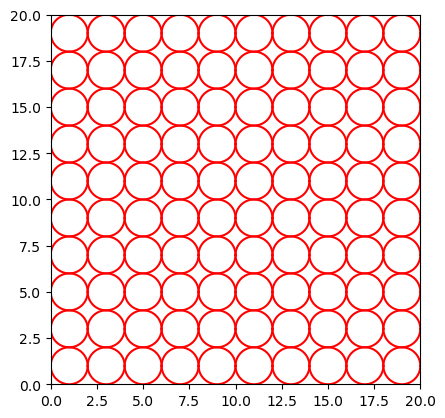

In [8]:
lado = 20 # lado del cuadrado
circulo = Circulo([-1, -1], 1) # cree un círculo de radio unitario y centro -1,-1
n_c = lado // (circulo.radio * 2) # número de círculos a lo largo del lado del cuadrado

area_circulos = 0.0 # inicialice el área de los círculos a 0

# use dos bucles
for i in range(n_c): # i mueve el círculo en y
    circulo.centro[0] = -1 # mueva la coordenada x del centro del círculo a -1
    circulo.mueva_en_y(2) # mueva el círculo 2 unidades a lo largo de y
    for j in range(n_c): # j mueve el círculo en x
        circulo.mueva_en_x(2) # mueva el círculo 2 unidades a lo largo de x
        area_circulos += circulo.area() # añada área del circulo
        x, y = circulo.coordenadas() # coordenadas x, y que definen el círculo
        plt.plot(x,y,'r-') # grafique el círculo

plt.axis("square") # esto hace la gráfica cuadrada
plt.xlim([0, 20]) # límites del eje x
plt.ylim([0, 20]) # límites del eje y

# calcule la porosidad areal
area_total = 20 * 20 # área del cuadrado
area_poros = area_total - area_circulos # área de los poros
print(f"Porosidad areal = {area_poros/area_total:.2f}")

En el código anterior utilizamos dos bucles anidados para dibujar los círculos dentro del cuadrado. La siguiente animación muestra cómo las primeras dos filas de círculos son dibujadas:

<img src="circulos.gif" alt="circulos" width="700"/><br><br>

Note que el código es muy eficiente, porque solamente un objecto de la clase `Circulo` es creado. Dentro de los bucles, sólo enviamos métodos al objeto para lograr nuestro resultado.

## Re-utilización de funciones y clases

Hemos implementado una función y una clase. Como utilizarlos en otros projectos? Esto es fácil: solo copie y pegue el código en un editor de texto. Guarde el archivo con una extension `py`. Note que si el código usa una librería externa como `numpy`, el archivo debe cargar esa librería. 

Como un ejemplo, hemos guardado la clase `Circulo` en el archivo `Circulo.py`. Ejecute el menu de Kernel -> Restart & Clear Output. Esto remueve el resultado de todas las celdas, y nos permite comenzar de nuevo. Ahora ejecute el código siguiente:

In [ ]:
from Circulo import Circulo # cargue la clase Circulo

circulo = Circulo([2.5, 3.2], 1.75) # construya un círculo usando la clase Circulo
print(f"Area del circulo = {circulo.area():.2f} unidades de área") # despliegue el área del círculo

## Nota

Los archivos que hemos utilizado en este cuaderno, están en el mismo directorio que el cuaderno. Por esta razón, no tenemos que preocuparnos por la dirección (path) de los archivos. En el módulo siguiente veremos como acceder archivos que están en directorios diferentes.